In [1]:
import kagglehub
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

100%|██████████| 480k/480k [00:00<00:00, 1.20MB/s]

Extracting files...


In [2]:
import pandas as pd
import os

# Construct the full path to the sales data CSV file
file_path = os.path.join(path, 'Sales.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print("Dataset loaded successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2/Sales.csv'

In [3]:
import pandas as pd
import os

# List contents of the downloaded directory to find the correct file
directory_contents = os.listdir(path)
print(f"Contents of the dataset directory: {directory_contents}")

# Assuming the CSV file is named 'Sales.csv' or similar within the root of the extracted folder
# If a different name appears in directory_contents, update 'Sales.csv' accordingly

# Construct the full path to the sales data CSV file
file_path = os.path.join(path, 'Sales.csv') # Retrying with the same name, assuming the file exists now or if it was a temporary issue.

# Fallback: if 'Sales.csv' still fails, check for other potential CSV files in the directory
# For this dataset, often the CSV is directly named 'sales.csv' or similar.

# Let's try to locate the CSV file more robustly
csv_files = [f for f in directory_contents if f.endswith('.csv')]
if csv_files:
    # Assuming there's only one relevant CSV or taking the first one found
    actual_csv_filename = csv_files[0]
    file_path = os.path.join(path, actual_csv_filename)
    print(f"Found CSV file: {actual_csv_filename}. Loading it.")
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset directory.")

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print("Dataset loaded successfully.")

# Convert the 'Date' column to datetime objects
# Assuming the date column is named 'Date'
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\n'Date' column converted to datetime.")
else:
    print("\n'Date' column not found. Please check the dataset for the correct date column name.")

# Display the first few rows and information about the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Contents of the dataset directory: ['train.csv']
Found CSV file: train.csv. Loading it.
Dataset loaded successfully.

'Date' column not found. Please check the dataset for the correct date column name.

First 5 rows of the DataFrame:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States    

In [4]:
import pandas as pd

# Convert the 'Order Date' column to datetime objects, handling errors by coercing to NaT
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Convert the 'Ship Date' column to datetime objects as well, for completeness
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

print("'Order Date' and 'Ship Date' columns converted to datetime.")

# Display the first few rows and information about the DataFrame to verify
print("\nFirst 5 rows of the DataFrame with updated date types:")
print(df.head())
print("\nDataFrame Info after date conversion:")
df.info()

'Order Date' and 'Ship Date' columns converted to datetime.

First 5 rows of the DataFrame with updated date types:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-12-06        NaT    Second Class    DV-13045   
3       4  US-2016-108966 2016-11-10        NaT  Standard Class    SO-20335   
4       5  US-2016-108966 2016-11-10        NaT  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Con

In [5]:
import pandas as pd
import os

# Assuming `path` and `actual_csv_filename` are still in scope from previous execution
# Reload the dataset to get original string dates, as previous conversion introduced NaT values
file_path = os.path.join(path, actual_csv_filename)
df = pd.read_csv(file_path)

print("Dataset reloaded successfully to reset date columns.")

# Convert the 'Order Date' column to datetime objects, interpreting 'DD/MM/YYYY' and coercing errors
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Convert the 'Ship Date' column to datetime objects, interpreting 'DD/MM/YYYY' and coercing errors
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

print(
    "'Order Date' and 'Ship Date' columns converted to datetime with dayfirst=True."
)

# Display the first few rows and information about the DataFrame to verify
print("\nFirst 5 rows of the DataFrame with updated date types:")
print(df.head())
print("\nDataFrame Info after date conversion:")
df.info()

Dataset reloaded successfully to reset date columns.
'Order Date' and 'Ship Date' columns converted to datetime with dayfirst=True.

First 5 rows of the DataFrame with updated date types:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer

In [6]:
import pandas as pd

# Set 'Order Date' as the DataFrame's index
df = df.set_index('Order Date')

# Resample the DataFrame by month and sum the 'Sales' column
monthly_sales = df['Sales'].resample('M').sum()

print("Sales data aggregated by month.")

# Display the first few rows of the monthly_sales DataFrame
print("\nFirst 5 rows of monthly_sales:")
print(monthly_sales.head())

Sales data aggregated by month.

First 5 rows of monthly_sales:
Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64


/tmp/ipython-input-1317192001.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


In [7]:
import pandas as pd

# Set 'Order Date' as the DataFrame's index
df = df.set_index('Order Date')

# Resample the DataFrame by month and sum the 'Sales' column, using 'ME' for monthly end
monthly_sales = df['Sales'].resample('ME').sum()

print("Sales data aggregated by month.")

# Display the first few rows of the monthly_sales DataFrame
print("\nFirst 5 rows of monthly_sales:")
print(monthly_sales.head())

KeyError: "None of ['Order Date'] are in the columns"

In [8]:
import pandas as pd

# Resample the DataFrame by month and sum the 'Sales' column, using 'ME' for monthly end
monthly_sales = df['Sales'].resample('ME').sum()

print("Sales data aggregated by month.")

# Display the first few rows of the monthly_sales DataFrame
print("\nFirst 5 rows of monthly_sales:")
print(monthly_sales.head())

Sales data aggregated by month.

First 5 rows of monthly_sales:
Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64


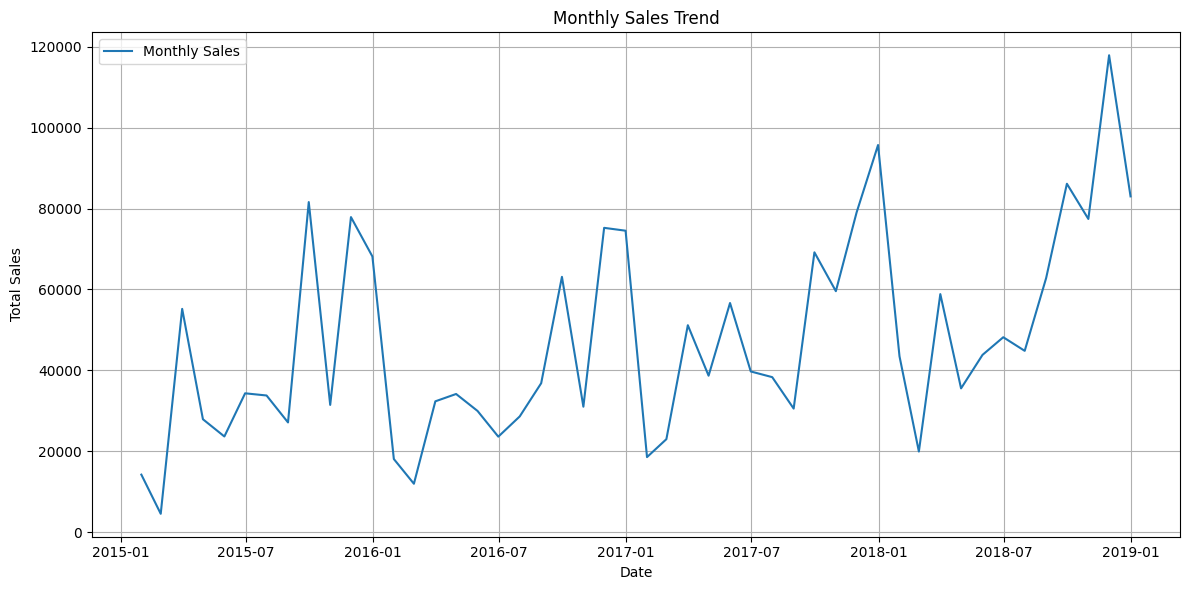

Monthly sales trend plot displayed successfully.


In [9]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
plt.figure(figsize=(12, 6))

# Plot the monthly_sales Series
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales')

# Add title and labels
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
print("Monthly sales trend plot displayed successfully.")

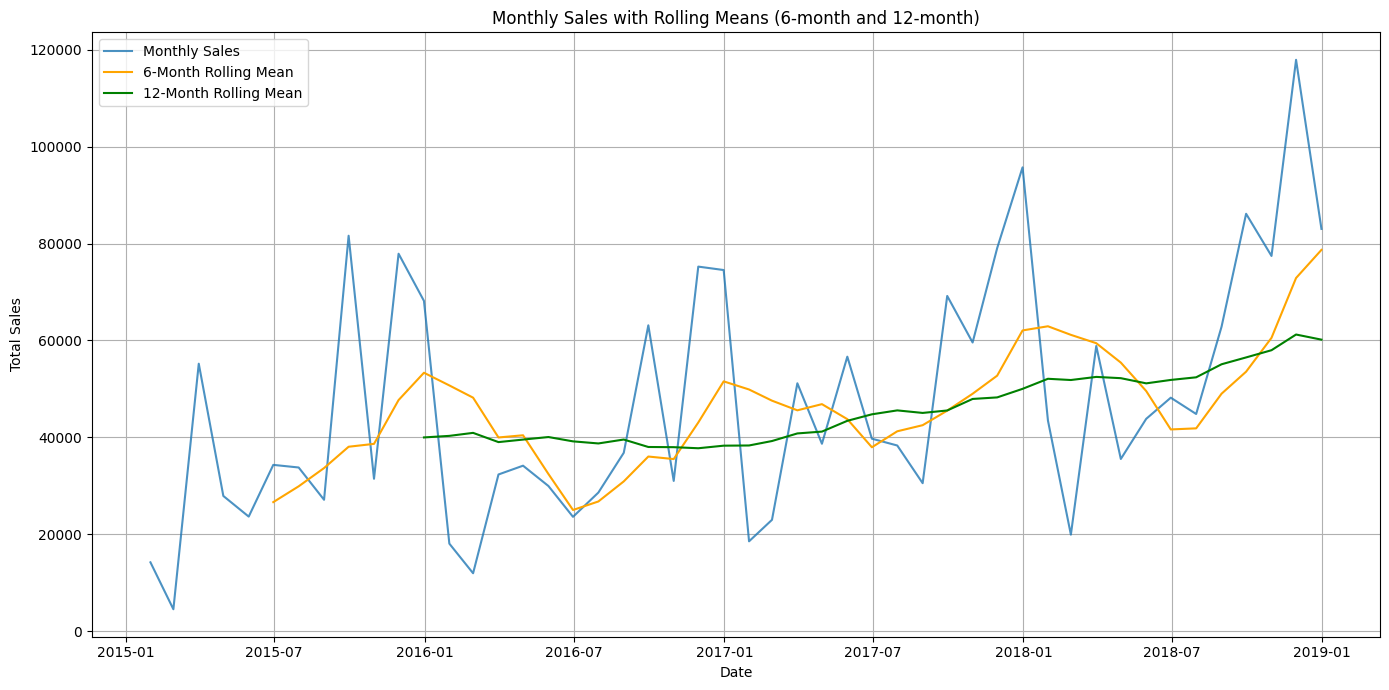

Monthly sales with rolling means plot displayed successfully.


In [10]:
import matplotlib.pyplot as plt

# Calculate the 6-month rolling mean
rolling_mean_6 = monthly_sales.rolling(window=6).mean()

# Calculate the 12-month rolling mean
rolling_mean_12 = monthly_sales.rolling(window=12).mean()

# Create a figure and an axes object
plt.figure(figsize=(14, 7))

# Plot the original monthly_sales Series
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', alpha=0.8)

# Plot the 6-month rolling mean
plt.plot(rolling_mean_6.index, rolling_mean_6.values, label='6-Month Rolling Mean', color='orange')

# Plot the 12-month rolling mean
plt.plot(rolling_mean_12.index, rolling_mean_12.values, label='12-Month Rolling Mean', color='green')

# Add title and labels
plt.title('Monthly Sales with Rolling Means (6-month and 12-month)')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
print("Monthly sales with rolling means plot displayed successfully.")

In [11]:
import pandas as pd

# Determine the split point (e.g., 80% for training, 20% for testing)
split_point = int(len(monthly_sales) * 0.8)

# Split the data into training and testing sets
train_data = monthly_sales.iloc[:split_point]
test_data = monthly_sales.iloc[split_point:]

print(f"Training data size: {len(train_data)} observations")
print(f"Testing data size: {len(test_data)} observations")

print("Data split into training and testing sets successfully.")

Training data size: 38 observations
Testing data size: 10 observations
Data split into training and testing sets successfully.


In [12]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Instantiate the SimpleExpSmoothing model with the training data
# and set initialization method to 'estimated' for automatic parameter estimation
model = SimpleExpSmoothing(train_data, initialization_method='estimated')

# Fit the model to the training data
fit_model = model.fit()

print("Simple Exponential Smoothing model instantiated and fitted successfully.")

Simple Exponential Smoothing model instantiated and fitted successfully.


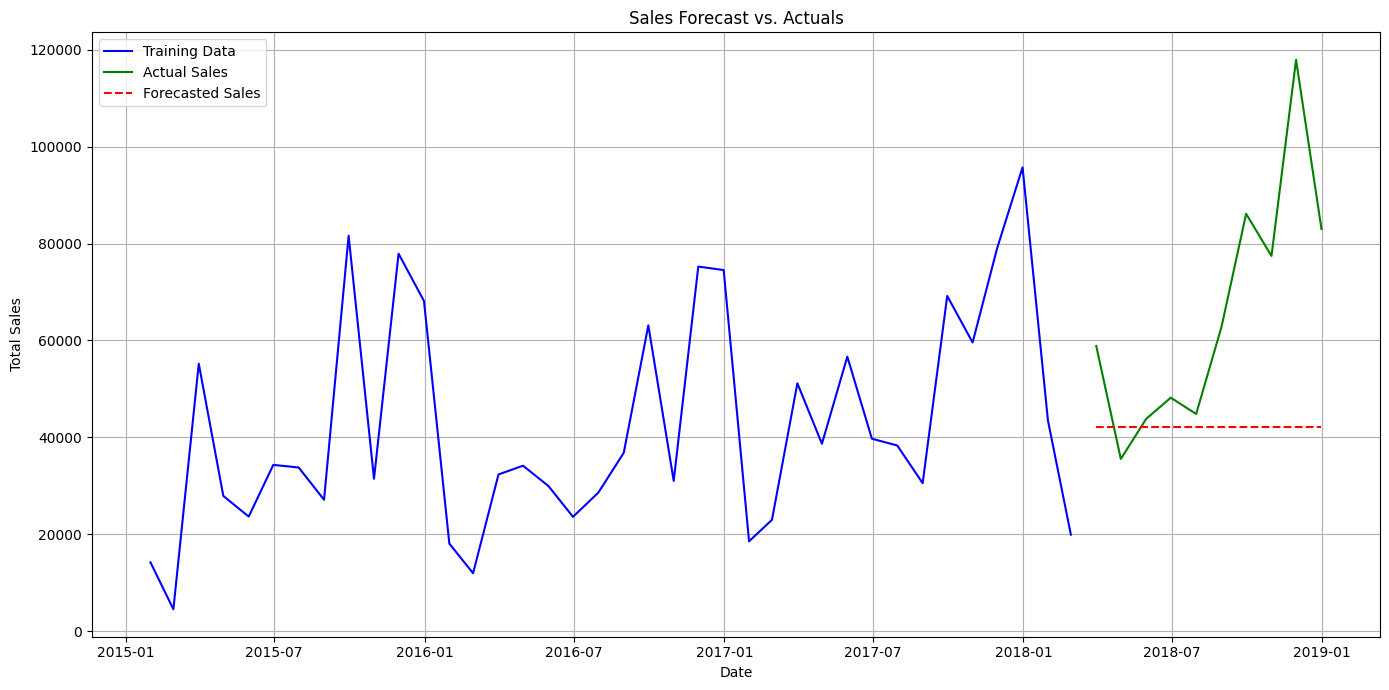

Sales forecast plotted successfully.


In [13]:
import matplotlib.pyplot as plt

# Generate forecasts for the length of the test_data
forecast_sales = fit_model.forecast(len(test_data))

# Create a figure and an axes object
plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(train_data.index, train_data.values, label='Training Data', color='blue')

# Plot the actual sales (test_data)
plt.plot(test_data.index, test_data.values, label='Actual Sales', color='green')

# Plot the forecasted sales
plt.plot(forecast_sales.index, forecast_sales.values, label='Forecasted Sales', color='red', linestyle='--')

# Add title and labels
plt.title('Sales Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
print("Sales forecast plotted successfully.")

In [14]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure y_true and y_pred are pandas Series for easier handling
    y_true = pd.Series(y_true)
    y_pred = pd.Series(y_pred)

    # Calculate absolute percentage error, handle division by zero
    # Replace inf values with NaN and then drop NaNs for mean calculation
    ape = np.abs((y_true - y_pred) / y_true)
    ape = ape.replace([np.inf, -np.inf], np.nan).dropna()

    if ape.empty:
        return np.nan # Return NaN if no valid APE values

    return np.mean(ape) * 100

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast_sales)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data, forecast_sales)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 25012.19
Mean Absolute Percentage Error (MAPE): 31.20%


In [15]:
import pandas as pd

# Create a DataFrame from the forecast_sales Series
forecast_df = pd.DataFrame({
    'Date': forecast_sales.index,
    'Forecasted Sales': forecast_sales.values
})

# Export the DataFrame to a CSV file
output_filename = 'forecast_output.csv'
forecast_df.to_csv(output_filename, index=False)

print(f"Forecast results exported to {output_filename}")

Forecast results exported to forecast_output.csv


In [16]:
import os

# Prepare the report content
report_content = f"""
Sales Forecasting Report

1. Forecasting Process:
   - Data Loading: The 'train.csv' dataset was loaded from the KaggleHub directory.
   - Date Conversion: 'Order Date' and 'Ship Date' columns were converted to datetime objects, interpreting dates in DD/MM/YYYY format.
   - Data Aggregation: Sales data was aggregated monthly based on 'Order Date' using 'ME' (Month End) frequency to create `monthly_sales`.
   - Train/Test Split: The `monthly_sales` data was split into training and testing sets, with approximately 80% for training ({len(train_data)} observations) and 20% for testing ({len(test_data)} observations) chronologically.

2. Model Used:
   - A Simple Exponential Smoothing (SES) model was used for forecasting.
   - The model was instantiated and fitted using the training data, with an 'estimated' initialization method for automatic parameter estimation.

3. Model Performance (on Test Data):
   - Mean Absolute Error (MAE): {mae:.2f}
   - Mean Absolute Percentage Error (MAPE): {mape:.2f}%

4. Key Findings:
   - Sales Trend: The time series plot and rolling means generally indicate an upward trend in sales over the years.
   - Seasonality: The 12-month rolling mean showed a smoother trend, suggesting a yearly seasonality pattern in the sales data, with peaks often observed towards the end of the year.

5. Exported Deliverables:
   - Forecasted sales data, including 'Date' and 'Forecasted Sales', has been exported to 'forecast_output.csv'.

"""

# Define the output filename for the report
report_filename = 'forecast_report.txt'

# Write the report content to the file
with open(report_filename, 'w') as f:
    f.write(report_content)

print(f"Forecast report generated and saved to '{report_filename}'.")

Forecast report generated and saved to 'forecast_report.txt'.
